### 네이버 스포츠뉴스 --> 워드클라우드

In [1]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

- 네이버 스포츠 뉴스 크롤링

In [16]:
sports = ['kbaseball', 'wbaseball', 'kfootball', 'wfootball', 'basketball','volleyball', 'golf', 'general']
base_url = 'https://sports.news.naver.com/'
suffix_url= '/news/index?isphoto=N&page='

In [79]:
driver = webdriver.Chrome()
url = f'{base_url}kbaseball{suffix_url}1'
driver.get(url)

In [5]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
lis = soup.select('.news_list > ul > li')
len(lis)

20

In [6]:
# 기사 제목
li = lis[0]
title = li.select_one('.title').get_text().strip()
title

'NC 구창모, 끝내 항저우행 불발 ‘김성윤-김영규 대체 발탁’'

- 종목별로 몇 페이지가 있는지 확인하기

In [9]:
# 10페이지가 넘는 종목 선택
url = f'{base_url}wfootball{suffix_url}1'
driver.get(url)

In [80]:
# 종목별 각 페이지별 라스트페이지 구하기
sports_dict = {}
for sport in sports:
    url = url = f'{base_url}{sport}{suffix_url}1'
    driver.get(url)
    time.sleep(2)
    next_clicked = 0    
    while True:
        try:
            driver.find_element(By.CSS_SELECTOR, '.paginate > .next').click()
            next_clicked += 1
            time.sleep(2)
        except:             # 모든 종목의 마지막 페이지가 있는 화면
            pages = driver.find_elements(By.CSS_SELECTOR, '.paginate > a')
            if next_clicked == 0:
                num_pages = len(pages) + 1
            else:
                num_pages = next_clicked * 10 + len(pages)
            sports_dict[sport] = num_pages
            break

sports_dict

{'kbaseball': 8,
 'wbaseball': 5,
 'kfootball': 8,
 'wfootball': 15,
 'basketball': 7,
 'volleyball': 5,
 'golf': 3,
 'general': 12}

- 모든 종목, 모든 페이지에 대해서 타이틀 가져오기

In [85]:
driver = webdriver.Chrome()                                                 # 브라우저는 크롬으로
#news_list = []                                                             # 수집한 타이틀 넣을 빈 리스트    
titles = ''                                                      
for sport, num_pages in sports_dict.items():                                # 각 종목별 라스트 페이지 딕셔너리를 이용한 반복문
    for page in range(1, num_pages+1):                                      # 라스트페이지까지 반복
        url = f'{base_url}{sport}{suffix_url}{page}'                        # 스포츠 뉴스 변화되는 url 
        driver.get(url)                                                     # 해당 url 브라우저로 오픈
        time.sleep(2)                                                       # 쉬었다가기 2초
        soup = BeautifulSoup(driver.page_source, 'html.parser')             # 드라이버는 페이지소스에 html로 읽을 것
        lis = soup.select('.news_list > ul > li')                           # title이 있는 각 리스트 위치!
        for li in lis:                                                      # 뉴스 리스트별로 반복!
            titles += li.select_one('.title').get_text().strip() + '\n'     # 빈리스트에 append 대신해도됨 => 리스트로 하면 txt파일로 만들어야함
            # title = li.select_one('.title').get_text().strip()            # title을 텍스트로 가져옴!
            # news_list.append(title)                                       # 가져온 title 텍스트 리스트에 집어넣기!
driver.close()

In [86]:
titles.count('\n')

1212

In [35]:
"""  리스트로 만들었을때
with open('data/네이버스포츠(title).txt', 'w', encoding='utf-8') as file:
    for new in news_list:
        file.write(new + '\n')
"""

In [38]:
import re, nltk
from konlpy.tag import Okt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [51]:
""" 위에 작업을 리스트로 했을때 
with open('data/네이버스포츠(title).txt') as file:
    text = file.read()

"""

In [87]:
okt = Okt()
tokens = okt.nouns(titles)
tokens[:10]

['선발', '등판', '송영진', '최대', '이닝', '소화', '엘리', '아스', '등판', '첫']

- 사각형 워드 클라우드

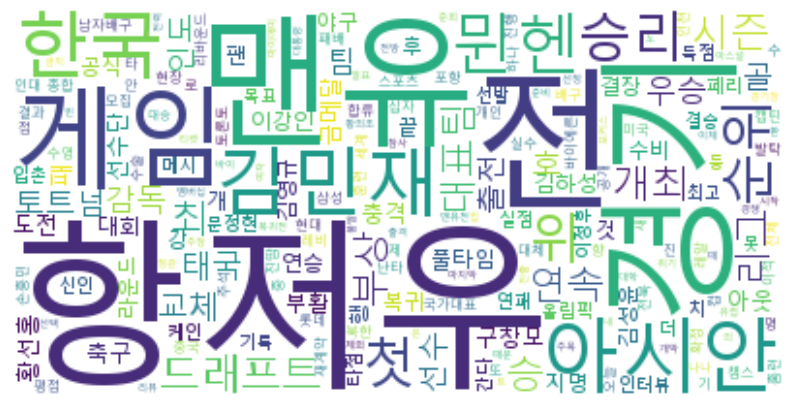

In [91]:
news = nltk.Text(tokens, name='스포츠 기사')
wc = WordCloud(
        background_color='white', random_state=2023,
        font_path = 'C:/Windows/Font/malgun.ttf', relative_scaling=0.4
    ).generate_from_frequencies(dict(news.vocab().most_common(300)))

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

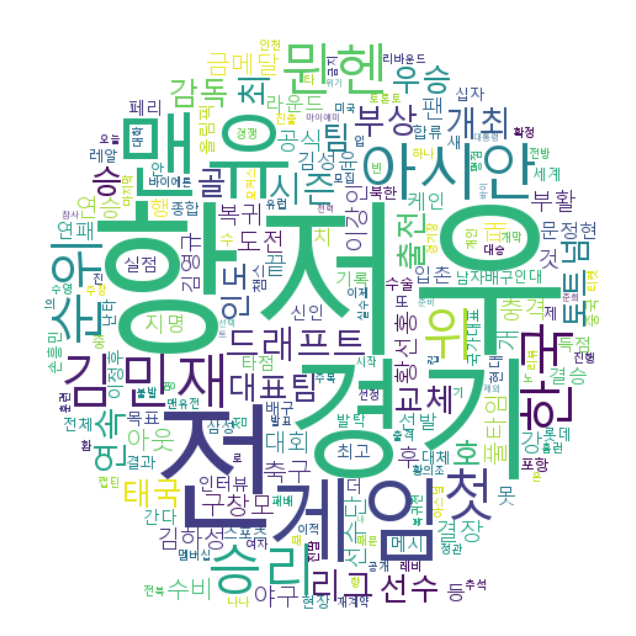

In [96]:
mask = np.array(Image.open('data/ball.jpg'))
wc = WordCloud(
        background_color='white', random_state=2023, mask=mask,
        font_path = 'C:/Windows/Font/malgun.ttf', relative_scaling=0.4
    ).generate_from_frequencies(dict(news.vocab().most_common(300)))
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');